In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
data = pd.read_csv("Cleaned Data.csv",index_col = "Unnamed: 0")

In [3]:
data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend


## Data Exploration

In [4]:
data.head()

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday


In [5]:
data.shape

(3892, 12)

In [6]:
data.columns

Index(['price', 'airline_name', 'departure_city', 'arrival_city',
       'travel_date', 'duration', 'stops', 'cabin_class', 'booking_date',
       'days_until_travel', 'booking_type', 'travel_type'],
      dtype='object')

In [7]:
data["booking_date"] = pd.to_datetime(data["booking_date"])

In [8]:
data["travel_date"] = pd.to_datetime(data["travel_date"])

In [9]:
data.dtypes

price                       float64
airline_name                 object
departure_city               object
arrival_city                 object
travel_date          datetime64[ns]
duration                      int64
stops                        object
cabin_class                  object
booking_date         datetime64[ns]
days_until_travel             int64
booking_type                 object
travel_type                  object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 0 to 3891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              3892 non-null   float64       
 1   airline_name       3892 non-null   object        
 2   departure_city     3892 non-null   object        
 3   arrival_city       3892 non-null   object        
 4   travel_date        3892 non-null   datetime64[ns]
 5   duration           3892 non-null   int64         
 6   stops              3892 non-null   object        
 7   cabin_class        3892 non-null   object        
 8   booking_date       3892 non-null   datetime64[ns]
 9   days_until_travel  3892 non-null   int64         
 10  booking_type       3892 non-null   object        
 11  travel_type        3892 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 395.3+ KB


#### Categorical columns

In [11]:
cat_cols = data.select_dtypes(include = "object").columns
cat_cols

Index(['airline_name', 'departure_city', 'arrival_city', 'stops',
       'cabin_class', 'booking_type', 'travel_type'],
      dtype='object')

#### Numerical columns

In [12]:
num_cols = data.select_dtypes(include = "number").columns
num_cols

Index(['price', 'duration', 'days_until_travel'], dtype='object')

#### Unique Values in Each Columns 

In [13]:
for i in data[cat_cols]:
    print(f"No of Unique Values in {i} column is:", data[i].unique())
    print("--"*20)

No of Unique Values in airline_name column is: ['Air India' 'IndiGo' 'Akasa Air' 'SpiceJet' 'Etihad Airways']
----------------------------------------
No of Unique Values in departure_city column is: ['Delhi' 'Banglore' 'Chennai' 'Mumbai' 'Kolkata']
----------------------------------------
No of Unique Values in arrival_city column is: ['Mumbai' 'Kolkata' 'Hyderabad' 'Goa' 'Banglore' 'Guwahathi']
----------------------------------------
No of Unique Values in stops column is: ['Direct' '1 stop' '3 stops' '2 stops']
----------------------------------------
No of Unique Values in cabin_class column is: ['Business' 'Economy' 'First' 'Premium Economy']
----------------------------------------
No of Unique Values in booking_type column is: ['Moderate' 'Advanced' 'Last-minute']
----------------------------------------
No of Unique Values in travel_type column is: ['Holiday' 'Weekday' 'Weekend']
----------------------------------------


In [14]:
for i in data[cat_cols]:
    print(f"No of Unique Values in {i} column is:", data[i].nunique())
    print("--"*20)

No of Unique Values in airline_name column is: 5
----------------------------------------
No of Unique Values in departure_city column is: 5
----------------------------------------
No of Unique Values in arrival_city column is: 6
----------------------------------------
No of Unique Values in stops column is: 4
----------------------------------------
No of Unique Values in cabin_class column is: 4
----------------------------------------
No of Unique Values in booking_type column is: 3
----------------------------------------
No of Unique Values in travel_type column is: 3
----------------------------------------


#### Summary Statistics 

In [15]:
data[num_cols].describe()

,price,duration,days_until_travel
count,3892.000000,3892.000000,3892.000000
mean,30434.573099,425.412384,24.342497
std,29713.645818,362.888379,18.421048
min,2682.000000,70.000000,2.000000
25%,10554.100000,155.000000,9.000000
50%,19105.110000,345.000000,19.000000
75%,40541.565000,525.000000,41.000000
max,291560.990000,1750.000000,55.000000


In [16]:
data[cat_cols].describe()

,airline_name,departure_city,arrival_city,stops,cabin_class,booking_type,travel_type
count,3892,3892,3892,3892,3892,3892,3892
unique,5,5,6,4,4,3,3
top,Air India,Delhi,Hyderabad,1 stop,Premium Economy,Moderate,Weekend
freq,3148,1167,740,2168,1358,1727,1345


#### Value Counts

In [17]:
for i in data[cat_cols].columns:
    print(f"Count of Each Value in {i} column is:", data[i].value_counts())
    print("--"*20)

Count of Each Value in airline_name column is: Air India         3148
IndiGo             637
Akasa Air           55
SpiceJet            30
Etihad Airways      22
Name: airline_name, dtype: int64
----------------------------------------
Count of Each Value in departure_city column is: Delhi       1167
Chennai      740
Mumbai       733
Banglore     699
Kolkata      553
Name: departure_city, dtype: int64
----------------------------------------
Count of Each Value in arrival_city column is: Hyderabad    740
Goa          733
Kolkata      699
Banglore     636
Guwahathi    553
Mumbai       531
Name: arrival_city, dtype: int64
----------------------------------------
Count of Each Value in stops column is: 1 stop     2168
Direct     1701
2 stops      22
3 stops       1
Name: stops, dtype: int64
----------------------------------------
Count of Each Value in cabin_class column is: Premium Economy    1358
Economy            1273
Business           1225
First                36
Name: cabin_class,

## Univariate Analysis

#### Price Analysis

In [18]:
data["price"].describe()

count      3892.000000
mean      30434.573099
std       29713.645818
min        2682.000000
25%       10554.100000
50%       19105.110000
75%       40541.565000
max      291560.990000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

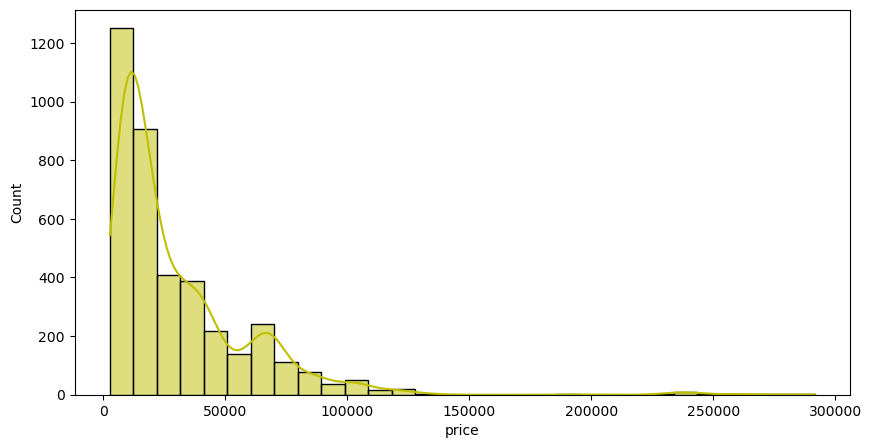

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(data = data,
             x = "price",
             bins = 30,
             kde = True,
             edgecolor = "k",
             color = "y")

From the summary statistics and the Histogram plot

+ The mean (30,434.57) is much higher than the median (19,105.11), indicating positive skewness. Most tickets are low-priced, but a few expensive ones drive up the average.
+ Ticket prices range from 2,682 (minimum) to 291,561 (maximum).
+ Most tickets are priced below 50,000, as shown by the density plot.
+ Most ticket prices fall between 10,554.10 and 40,541.57 (25th to 75th percentile).
+ There are few ouliers in the price column where prices above 100,000 are rare and represent premium tickets, which account for a very small portion of the dataset.

#### Detecting Outliers

In [20]:
def detect_outliers(df, column):
    Q1 = np.quantile(data[column],0.25)
    Q2 =  np.quantile(data[column],0.50)
    Q3 = np.quantile(data[column],0.75)

    iqr = Q3 - Q1
    print(f"iqr : {iqr}")
    
    lower_whisker = Q1 - 1.5* iqr
    upper_whisker = Q3 + 1.5* iqr

    outliers = data[(data[column] < lower_whisker) | (data[column] > upper_whisker)]
    return outliers

In [21]:
for column in num_cols:
    outliers = detect_outliers(data, column)
    print(outliers)
    print(f"Number of outliers in '{column}': {len(outliers)}\n")

iqr : 29987.465000000004
         price airline_name departure_city arrival_city travel_date  duration  \
128   104723.0    Air India       Banglore      Kolkata  2024-12-25       405   
131    90096.0    Air India       Banglore      Kolkata  2024-12-25       560   
132   105484.0    Air India       Banglore      Kolkata  2024-12-25       475   
134   116458.0    Air India       Banglore      Kolkata  2024-12-25       445   
135    90597.0    Air India       Banglore      Kolkata  2024-12-25       645   
...        ...          ...            ...          ...         ...       ...   
3819   86185.0    Air India        Kolkata    Guwahathi  2024-12-21       625   
3822  124607.0    Air India        Kolkata    Guwahathi  2024-12-21       470   
3835   89511.0    Air India        Kolkata    Guwahathi  2024-12-22      1165   
3836   93445.0    Air India        Kolkata    Guwahathi  2024-12-22      1305   
3837  103993.0    Air India        Kolkata    Guwahathi  2024-12-22      1530   

  

In [22]:
detect_outliers(data,"price")["cabin_class"].unique()

iqr : 29987.465000000004


array(['Business', 'First', 'Premium Economy'], dtype=object)

In [23]:
detect_outliers(data,"price")["cabin_class"].value_counts()

iqr : 29987.465000000004


Business           143
First               22
Premium Economy     15
Name: cabin_class, dtype: int64

<Axes: xlabel='cabin_class', ylabel='price'>

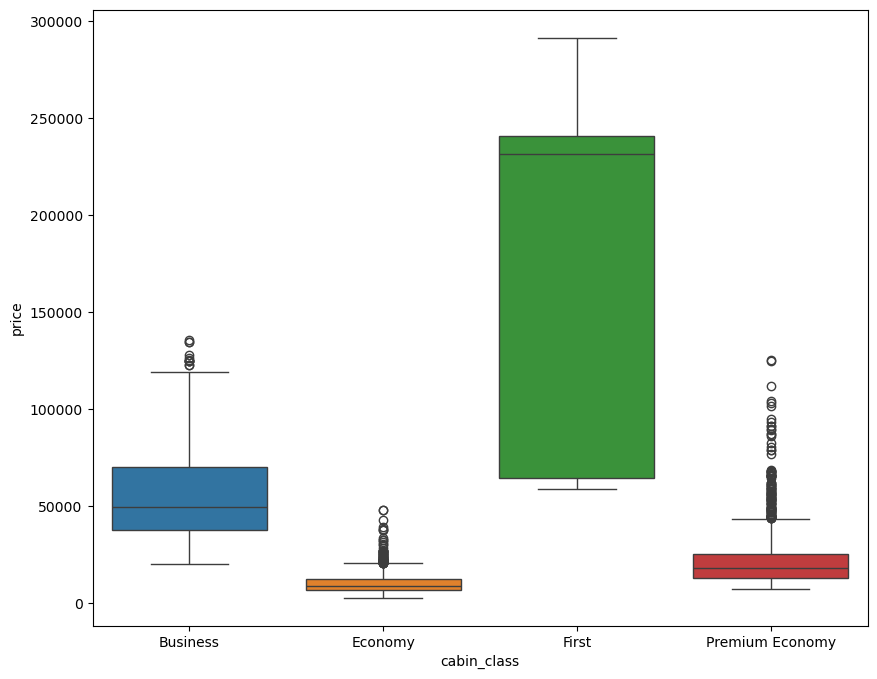

In [24]:
plt.figure(figsize = (10,8))
sns.boxplot(data = data,
               y = "price",
               x = "cabin_class",
            palette = "tab10")

+ Outliers represent valid pricing, not errors, and accurately reflect real market conditions.
+ They emphasize significant price variability in Business, First, and Premium Economy classes due to their premium and demand-driven nature.
+ Economy Class shows minimal outliers, maintaining consistent and predictable pricing for budget travelers.

In [25]:
data.groupby(by = "cabin_class")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
cabin_class,,,,,,,,
Business,1225.0,55953.609624,23549.041730,19799.00,37405.7200,49612.36,69998.0000,135446.00
Economy,1273.0,10330.143386,5283.348968,2682.00,6749.0000,8745.07,12190.0000,48040.00
First,36.0,172866.826389,90705.742224,58889.63,64125.3375,231294.41,240552.3425,291560.99
Premium Economy,1358.0,22485.057754,14984.457729,6865.44,12871.6100,18046.50,25170.4375,125368.00


In [31]:
data['route'] = data['departure_city'] + " → " + data['arrival_city']
data

,price,airline_name,departure_city,arrival_city,travel_date,duration,stops,cabin_class,booking_date,days_until_travel,booking_type,travel_type,route
0,29384.18,Air India,Delhi,Mumbai,2024-12-25,130,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
1,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
2,37417.30,Air India,Delhi,Mumbai,2024-12-25,125,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
3,29384.18,Air India,Delhi,Mumbai,2024-12-25,135,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
4,29382.40,Air India,Delhi,Mumbai,2024-12-25,145,Direct,Business,2024-12-16,9,Moderate,Holiday,Delhi → Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,22384.00,Air India,Kolkata,Guwahathi,2025-02-09,1220,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3888,19497.00,Air India,Kolkata,Guwahathi,2025-02-09,1545,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3889,42707.00,Air India,Kolkata,Guwahathi,2025-02-09,660,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi
3890,42203.00,Air India,Kolkata,Guwahathi,2025-02-09,775,1 stop,Premium Economy,2024-12-16,55,Advanced,Weekend,Kolkata → Guwahathi


+ Economy Class Has the lowest prices and don’t vary much and Best for budget-friendly travelers.
+ Premium Economy is slightly more expensive than Economy class and here prices vary a bit more but are still reasonable.A good choice for travelers looking for extra comfort.
+ Business Class prices are much higher than Economy and Premium Economy and a wide range of prices is available.Suitable for travelers who want a premium experience.
+ First Class prices are the most expensive tickets which vary a lot, with some very high amounts and designed for a small group of luxury travelers.

*Ticket Price*

### Summary staistics of prices

In [36]:
data["price"].describe()

count      3892.000000
mean      30434.573099
std       29713.645818
min        2682.000000
25%       10554.100000
50%       19105.110000
75%       40541.565000
max      291560.990000
Name: price, dtype: float64

### for checking distribution i used histogram

<Axes: xlabel='price', ylabel='Count'>

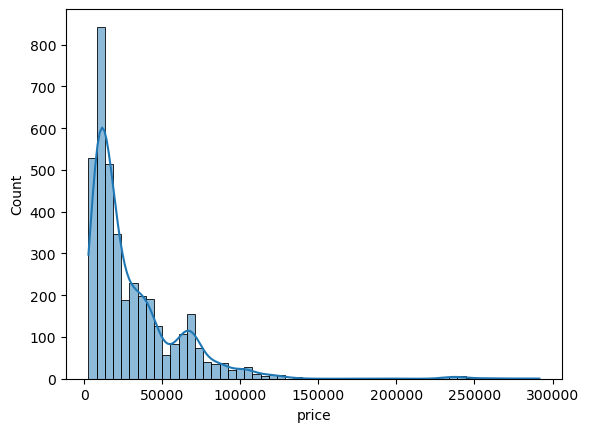

In [39]:
sns.histplot(data=data,x="price",kde=True,bins=55)  #positively skewed 

<Axes: >

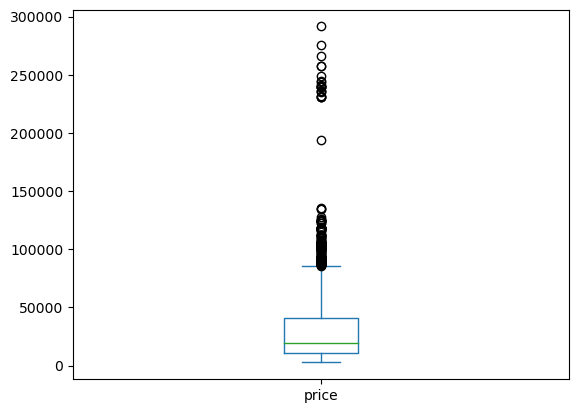

In [42]:
data["price"].plot(kind = "box")  

In [48]:
data["travel_date"]

0      2024-12-25
1      2024-12-25
2      2024-12-25
3      2024-12-25
4      2024-12-25
          ...    
3887   2025-02-09
3888   2025-02-09
3889   2025-02-09
3890   2025-02-09
3891   2025-02-09
Name: travel_date, Length: 3892, dtype: datetime64[ns]

# Route Analysis

In [63]:
data["route"].describe()

count                    3892
unique                      6
top       Chennai → Hyderabad
freq                      740
Name: route, dtype: object

In [54]:
data["route"].value_counts()

Chennai → Hyderabad    740
Mumbai → Goa           733
Banglore → Kolkata     699
Delhi → Banglore       636
Kolkata → Guwahathi    553
Delhi → Mumbai         531
Name: route, dtype: int64

<Axes: >

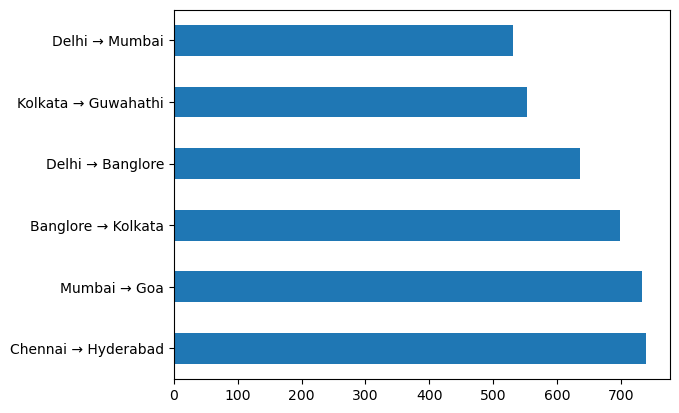

In [53]:
data["route"].value_counts().plot(kind="barh")

+ High Demand: Chennai → Hyderabad, Mumbai → Goa, and Bangalore → Kolkata have the most bookings.
+ Moderate Demand: Delhi → Bangalore and  show consistent demand.
+ Low Demand: Kolkata → Guwahati,Delhi → Mumbai has the least bookings.

# No of stops

In [65]:
data["stops"].value_counts(normalize=True)

1 stop     0.557040
Direct     0.437050
2 stops    0.005653
3 stops    0.000257
Name: stops, dtype: float64

<Axes: ylabel='stops'>

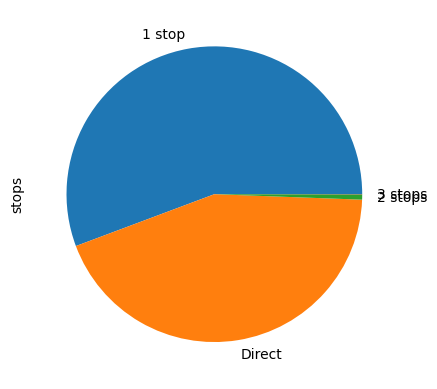

+ 1-Stop Flights Dominate: The highest number of flights (2168) are 1-stop, showing their popularity due to route coverage or affordability.
+ Direct Flights Are Common: Direct flights (1701) are the second most preferred, reflecting demand for convenience.
+ Multi-Stop Flights Are Rare: Only 22 flights have 2 stops, and just 1 has 3 stops, indicating low demand or limited availability.
+ 1-stop flights balance cost and connectivity, while direct flights cater to those prioritizing convenience. Multi-stop flights are insignificant.

In [60]:
data["cabin_class"].describe()

count                3892
unique                  4
top       Premium Economy
freq                 1358
Name: cabin_class, dtype: object

<Axes: >

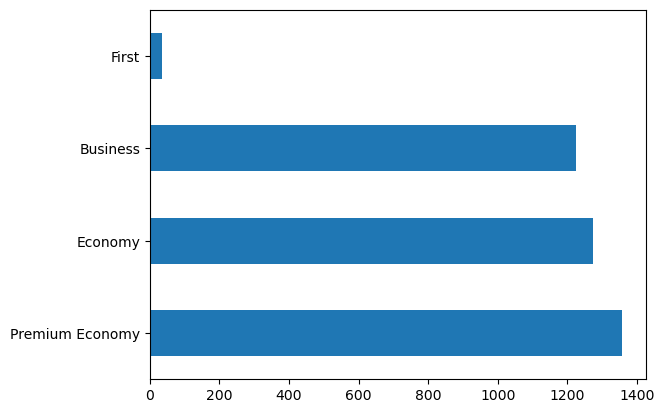

In [62]:
data["cabin_class"].value_counts().plot(kind="barh")

+ Travelers prioritize comfort and affordability, as Premium Economy often offers better amenities than Economy at a lower price than Business or First Class.

In [74]:
data["airline_name"].value_counts(normalize=True)*(100)

Air India         80.883864
IndiGo            16.366906
Akasa Air          1.413155
SpiceJet           0.770812
Etihad Airways     0.565262
Name: airline_name, dtype: float64

<Axes: >

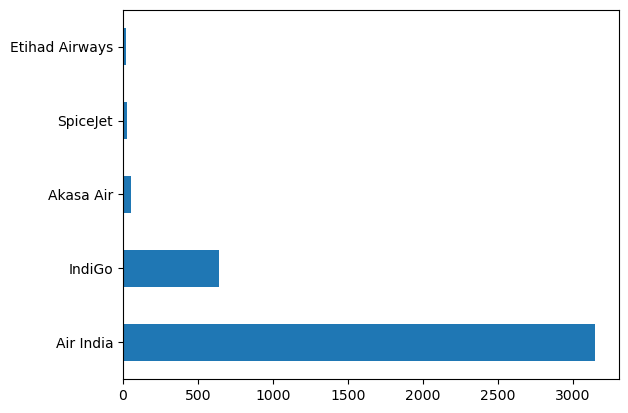

In [76]:
data["airline_name"].value_counts().plot(kind="barh")

+ Air India dominates with 80.88%, IndiGo holds 16.37%, while Akasa (1.41%), SpiceJet (0.78%), and Etihad have minimal shares.






